# working with Geopandas modules

In [6]:
import geopandas as gpd

data = gpd.read_file("C:\\Users\\Toyin Obasoro\\Desktop\\Geoscience Coding\\Geopandas-Geo-Python\\L2_data\Europe_borders.shp")

In [7]:
data.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.45778 54.56236, 8.44953 54.56269, ..."
1,Europe/Berlin,"POLYGON ((8.71992 47.69664, 8.72092 47.69530, ..."
2,Europe/Berlin,"POLYGON ((6.73317 53.57409, 6.73017 53.57542, ..."
3,Europe/Berlin,"POLYGON ((6.85822 53.59411, 6.85592 53.59550, ..."
4,Europe/Berlin,"POLYGON ((6.89894 53.62561, 6.88439 53.62814, ..."


In [8]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   TZID      3632 non-null   object  
 1   geometry  3632 non-null   geometry
dtypes: geometry(1), object(1)
memory usage: 56.9+ KB


In [14]:
type(data)

geopandas.geodataframe.GeoDataFrame

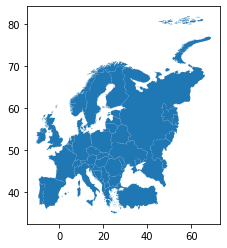

In [15]:
data.plot()

In [16]:
print(data['geometry'].head())

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry


In [32]:
# Let's make a copy of our data
orig = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

# Check the new geometry values
print(data['geometry'].head())

0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry


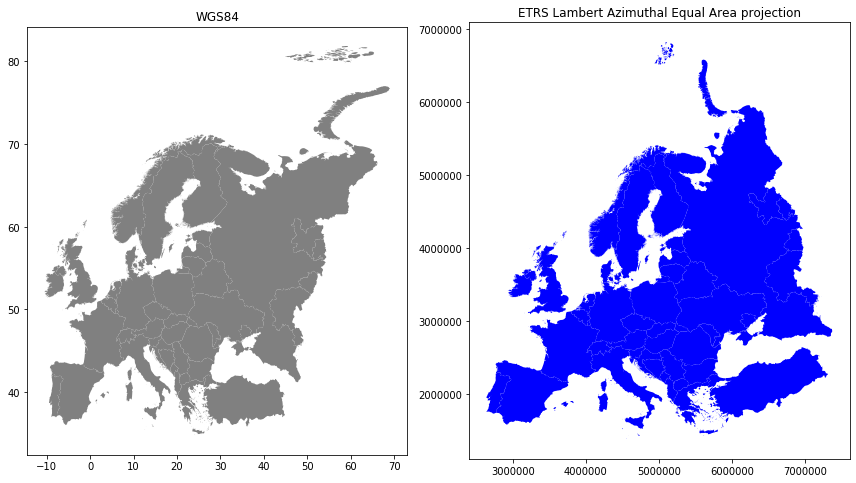

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor='gray');

# Add title
ax1.set_title("WGS84");

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2, facecolor='blue');

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection");

# Remove empty white space around the plot
plt.tight_layout()

In [17]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get the area of the polygon
    poly_area = row['geometry'].area
    # Print information for the user
    print("Polygon area at index {index} is: {area:.3f}".format(index=index, area=poly_area))

Polygon area at index 0 is: 0.000
Polygon area at index 1 is: 0.001
Polygon area at index 2 is: 0.004
Polygon area at index 3 is: 0.000
Polygon area at index 4 is: 0.001


In [19]:

# Create a new column called 'area' and assign the area of the Polygons into it
data['area'] = data.area

# Print first 2 rows of the area column
print(data['area'].head(2))

C:\Users\Toyin Obasoro\New folder (2)\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  


0    0.000341
1    0.000886
Name: area, dtype: float64


In [20]:
# Maximum area
max_area = data['area'].max()

# Minimum area
min_area = data['area'].min()

# Mean area
mean_area = data['area'].mean()

print("Max area: {max}\nMin area: {min}\nMean area: {mean}".format(max=round(max_area, 2), min=round(min_area, 2), mean=round(mean_area, 2)))

Max area: 464.72
Min area: 0.0
Mean area: 0.39


In [21]:

# Import necessary modules first
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()

# Let's see what we have at the moment
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


In [22]:
# Create a new column called 'geometry' to the GeoDataFrame
newdata['geometry'] = None

# Let's again see what's inside
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


In [23]:

# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

# Let's see what we have
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [24]:
# Insert the polygon into 'geometry' -column at index 0
newdata.loc[0, 'geometry'] = poly

# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


In [29]:
#Add a new column and insert data
newdata.loc[0, 'location'] = ('Senaatintori')

# Let's check the data
print(newdata)

                                            geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori


In [30]:
# Import specific function 'from_epsg' from fiona module
from fiona.crs import from_epsg

# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

+init=epsg:4326 +no_defs +type=crs


C:\Users\Toyin Obasoro\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [31]:

# Determine the output path for the Shapefile
outfp = "L2_data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

In [35]:
gpd.__version__

'0.8.0+3.gb5ed1a4'

In [37]:
import pycrs

In [39]:
epsg_code = 3035
data.crs = pycrs.parse.from_epsg_code(epsg_code).to_proj4()

In [40]:
print(data.crs)

+proj=laea +ellps=GRS80 +a=6378137.0 +rf=298.257222101 +towgs84=0,0,0,0,0,0,0 +pm=0 +lon_0=10 +x_0=4321000 +y_0=3210000 +lat_0=52 +units=m +axis=enu +no_defs +type=crs


In [41]:
# Import necessary modules
from shapely.geometry import Point
import pycrs

# Create the point representing Helsinki (in WGS84)
hki_lon = 24.9417
hki_lat = 60.1666

# Create GeoDataFrame
helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], geometry='geometry', crs={'init': 'epsg:4326'}, columns=['geometry'])

# Print
print(helsinki)

C:\Users\Toyin Obasoro\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


                    geometry
0  POINT (24.94170 60.16660)


In [42]:
import os
os.name

'nt'

In [43]:
os.environ

environ{'ALLUSERSPROFILE': 'C:\\ProgramData',
        'APPDATA': 'C:\\Users\\Toyin Obasoro\\AppData\\Roaming',
        'COMMONPROGRAMFILES': 'C:\\Program Files\\Common Files',
        'COMMONPROGRAMFILES(X86)': 'C:\\Program Files (x86)\\Common Files',
        'COMMONPROGRAMW6432': 'C:\\Program Files\\Common Files',
        'COMPUTERNAME': 'DESKTOP-G9AD7US',
        'COMSPEC': 'C:\\WINDOWS\\system32\\cmd.exe',
        'CONDA_DEFAULT_ENV': 'base',
        'CONDA_EXE': 'C:\\Users\\Toyin Obasoro\\New folder (2)\\Scripts\\conda.exe',
        'CONDA_PREFIX': 'C:\\Users\\Toyin Obasoro\\New folder (2)',
        'CONDA_PROMPT_MODIFIER': '(base) ',
        'CONDA_PYTHON_EXE': 'C:\\Users\\Toyin Obasoro\\New folder (2)\\python.exe',
        'CONDA_SHLVL': '1',
        'DRIVERDATA': 'C:\\Windows\\System32\\Drivers\\DriverData',
        'FPS_BROWSER_APP_PROFILE_STRING': 'Internet Explorer',
        'FPS_BROWSER_USER_PROFILE_STRING': 'Default',
        'HOMEDRIVE': 'C:',
        'HOMEPATH': '\\Users\

# Working with GIS data

In [44]:
# import of builtin libraries
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
import seaborn as sns

In [45]:
# to get current working directory
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 'L2_data',
 'L2_data.zip',
 'Mapping-Geopython.ipynb',
 'Work-Geopython.ipynb']

In [46]:
# create column names as this comes without headers
col_names = ['UserID', 'VenueID', 'VenueCategoryID', 'VenueCategoryName', 'Latitude', 'Longtitude','Timezone', 'UTCtime']
data_nyc = pd.read_csv("C:\\Users\\Toyin Obasoro\\Geospatial-Data-Science-Quick-Start-Guide\\dataset\\NYC_Foursquare_2014\dataset_TSMC2014_NYC.txt", names=col_names, sep='\t', encoding = "ISO-8859-1" )

In [47]:
data_nyc.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [48]:
print('The Shape of the data:', data_nyc.shape)

The Shape of the data: (227428, 8)


# Converting to Geopgraphic Unit

In [49]:
# Save the geometry as a new feature
geometry = [Point(xy) for xy in zip(data_nyc['Longtitude'], data_nyc['Latitude'])]

# Create crs dictionary
crs = {'init': 'epsg:4326'}

In [51]:
data_gdf = gpd.GeoDataFrame(data_nyc, crs=crs, geometry=geometry)
data_gdf.head()

C:\Users\Toyin Obasoro\AppData\Roaming\Python\Python37\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (-74.00258 40.71981)
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,POINT (-74.04417 40.60680)
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,POINT (-73.88307 40.71616)
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.98252 40.74516)
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,POINT (-73.98966 40.74010)


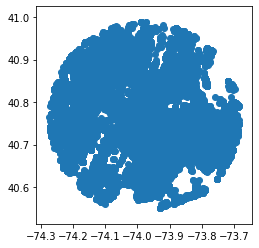

In [59]:
# visualizing the data set
data_gdf.geometry.plot()
plt.show()

In [58]:
#  Create a new column called 'area' and assign the area of the Polygons into it
#data_nyc['area'] = data_nyc.area

# Print first 2 rows of the area column
#print(data_nyc['area'].head(2))

# User Define Methods

In [61]:
user395 = data_gdf[data_gdf['UserID'] == 395]
user395.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.98252 40.74516)
7820,395,4b607313f964a5209be629e3,4bf58dd8d48988d176941735,Gym / Fitness Center,40.748005,-74.008627,-240,Tue Apr 10 02:14:21 +0000 2012,POINT (-74.00863 40.74800)
15980,395,4a72e5fef964a52050db1fe3,4bf58dd8d48988d176941735,Gym / Fitness Center,40.746326,-74.008624,-240,Sat Apr 14 17:59:13 +0000 2012,POINT (-74.00862 40.74633)
17162,395,4c7447221b30a093c93fec09,4bf58dd8d48988d16d941735,Café,40.643021,-73.977502,-240,Sun Apr 15 02:09:25 +0000 2012,POINT (-73.97750 40.64302)
17866,395,4d716e7f1c01b60c219214c7,4bf58dd8d48988d10c951735,Cosmetics Shop,40.762617,-73.993360,-240,Sun Apr 15 16:12:55 +0000 2012,POINT (-73.99336 40.76262)


In [63]:
user395.shape

(106, 9)

In [64]:
user395['VenueCategoryID'].nunique()

36

In [65]:
user395.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 106 entries, 3 to 226302
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   UserID             106 non-null    int64   
 1   VenueID            106 non-null    object  
 2   VenueCategoryID    106 non-null    object  
 3   VenueCategoryName  106 non-null    object  
 4   Latitude           106 non-null    float64 
 5   Longtitude         106 non-null    float64 
 6   Timezone           106 non-null    int64   
 7   UTCtime            106 non-null    object  
 8   geometry           106 non-null    geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 8.3+ KB


In [66]:
kunle_map = folium.Map(location = [40.71981037548853, -74.00258103213994],
    tiles='Stamen Toner',
    zoom_start = 15)
folium.GeoJson(user395).add_to(kunle_map)
kunle_map

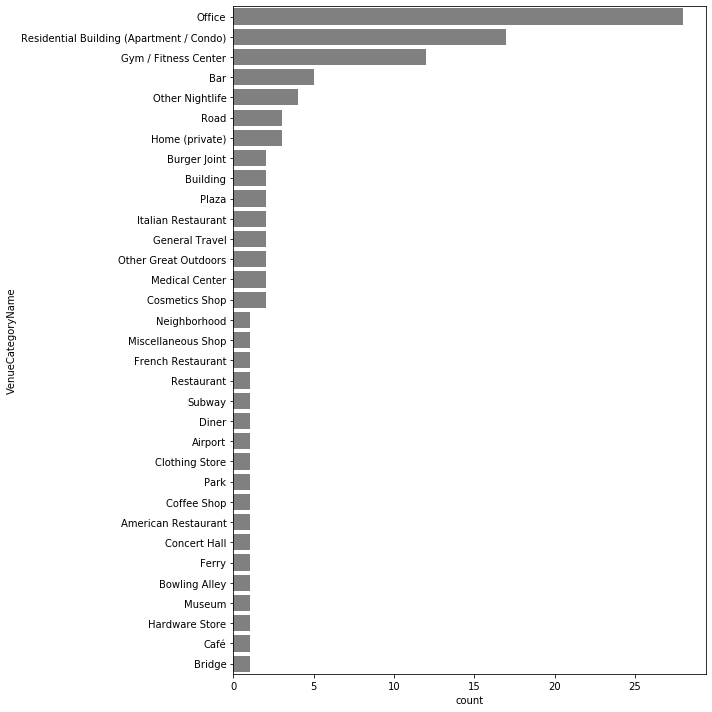

In [71]:
# Using matplotlib for visualization

fig, ax = plt.subplots(figsize=(10, 10))
plot = sns.countplot(y = 'VenueCategoryName', 
                     color='grey',
              order = user395['VenueCategoryName'].value_counts().index,
              data=user395, ax=ax)

plot.figure.savefig('user395.png')

plot
plt.tight_layout()
plt.show()

In [79]:
data_gdf['VenueID'].value_counts()

42911d00f964a520f5231fe3    1147
42829c80f964a5206a221fe3     874
43a52546f964a520532c1fe3     687
4840fe6bf964a52030501fe3     562
4ace6c89f964a52078d020e3     561
                            ... 
4c93c85cefecb713f875da9d       1
4bd3c988caff952174ced5f0       1
4c041246187ec928218bb67b       1
4a009599f964a52096701fe3       1
4bc34714f8219c7478d3b510       1
Name: VenueID, Length: 38333, dtype: int64

In [81]:
#venueID = '4aca718ff964a520f6c120e3' 
venueID = '42911d00f964a520f5231fe3'
train_station = data_gdf[data_nyc['VenueID'] == venueID]
train_station.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
554,208,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,Tue Apr 03 23:03:23 +0000 2012,POINT (-73.99358 40.75079)
556,619,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,Tue Apr 03 23:04:11 +0000 2012,POINT (-73.99358 40.75079)
786,492,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,Wed Apr 04 00:33:31 +0000 2012,POINT (-73.99358 40.75079)
1237,1074,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,Wed Apr 04 09:45:06 +0000 2012,POINT (-73.99358 40.75079)
1264,1021,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,Wed Apr 04 10:38:11 +0000 2012,POINT (-73.99358 40.75079)


In [82]:
train_station.shape

(1147, 9)

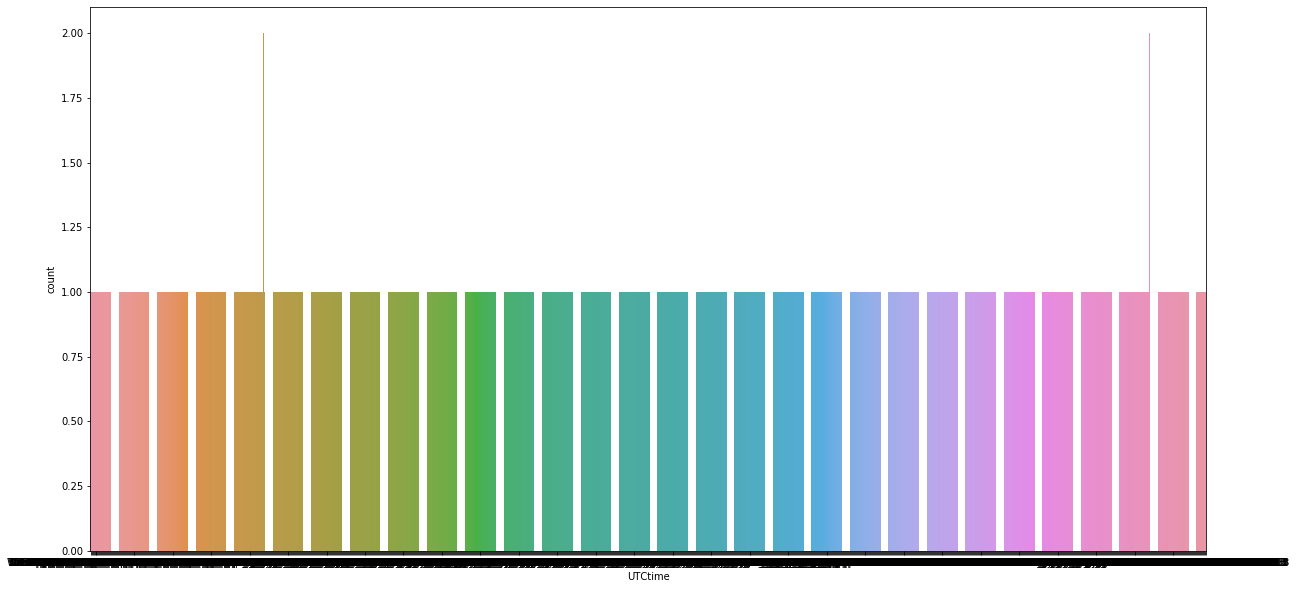

In [85]:
fig, ax = plt.subplots(figsize=(20,10))
plot = sns.countplot(x = 'UTCtime', 
              #order = gym['hours'].value_counts().index,
              data=train_station, ax=ax)
plot.figure.savefig('train_station.png')

plot;

In [86]:
train_station['UTCtime'] = pd.to_datetime(train_station['UTCtime'])

C:\Users\Toyin Obasoro\New folder (2)\lib\site-packages\geopandas\geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [87]:
train_station['hour'] = train_station['UTCtime'].dt.hour

C:\Users\Toyin Obasoro\New folder (2)\lib\site-packages\geopandas\geodataframe.py:831: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [88]:
train_station.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry,hour
554,208,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,2012-04-03 23:03:23+00:00,POINT (-73.99358 40.75079),23
556,619,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,2012-04-03 23:04:11+00:00,POINT (-73.99358 40.75079),23
786,492,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,2012-04-04 00:33:31+00:00,POINT (-73.99358 40.75079),0
1237,1074,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,2012-04-04 09:45:06+00:00,POINT (-73.99358 40.75079),9
1264,1021,42911d00f964a520f5231fe3,4bf58dd8d48988d129951735,Train Station,40.750795,-73.993576,-240,2012-04-04 10:38:11+00:00,POINT (-73.99358 40.75079),10


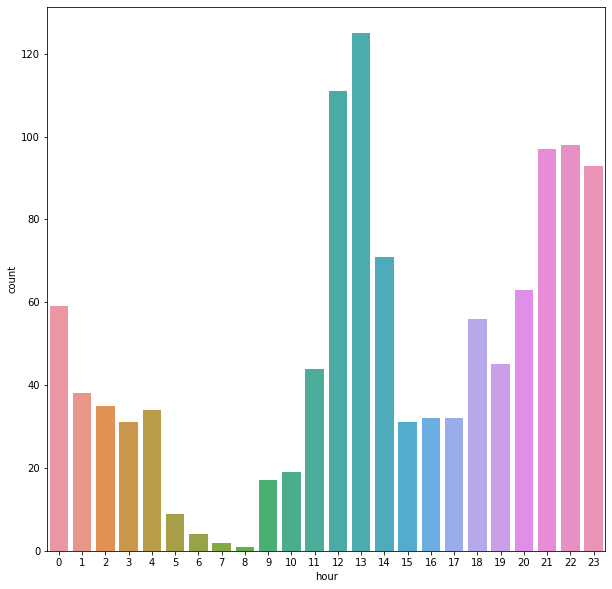

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
plot = sns.countplot(x = 'hour', 
              #order = gym['hours'].value_counts().index,
              data=train_station, ax=ax)
plot.figure.savefig('train_station.png')

plot;

# Visualization of Data analysis

From the above graph, most train stations have heavy traffic at noon and late in the evening. This may be due to closing period and break time for most worker